In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
arr = np.array([1, 2, 3, 4, 5])
data = pd.read_csv('World_GDP_Dataset.csv')
print(data.head())


  GDP, current prices (Billions of U.S. dollars)    1980    1981    1982  \
0                                    Afghanistan   0.000   0.000   0.000   
1                                        Albania   1.946   2.229   2.296   
2                                        Algeria  42.346  44.372  44.780   
3                                        Andorra   0.000   0.000   0.000   
4                                         Angola   6.639   6.214   6.214   

     1983    1984    1985    1986    1987    1988  ...     2014     2015  \
0   0.000   0.000   0.000   0.000   0.000   0.000  ...   20.616   20.057   
1   2.319   2.290   2.339   2.587   2.566   2.530  ...   13.246   11.389   
2  47.529  51.513  61.132  61.535  63.300  51.664  ...  213.810  165.979   
3   0.000   0.000   0.000   0.000   0.000   0.000  ...    3.267    2.789   
4   6.476   6.864   8.457   7.918   9.050   9.818  ...  145.712  116.194   

      2016     2017     2018     2019     2020     2021     2022     2023  
0   18.020

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'World_GDP_Dataset.csv'
df = pd.read_csv(file_path)
print(df.isnull().sum())
print(df.describe())


GDP, current prices (Billions of U.S. dollars)    33
1980                                              34
1981                                              34
1982                                              34
1983                                              34
1984                                              34
1985                                              34
1986                                              34
1987                                              34
1988                                              34
1989                                              34
1990                                              34
1991                                              34
1992                                              34
1993                                              34
1994                                              34
1995                                              34
1996                                              34
1997                                          

In [4]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GDP, current prices (Billions of U.S. dollars)  197 non-null    object 
 1   1980                                            196 non-null    float64
 2   1981                                            196 non-null    float64
 3   1982                                            196 non-null    float64
 4   1983                                            196 non-null    float64
 5   1984                                            196 non-null    float64
 6   1985                                            196 non-null    float64
 7   1986                                            196 non-null    float64
 8   1987                                            196 non-null    float64
 9   1988                                       

In [5]:
import pandas as pd
df = pd.read_csv('World_GDP_Dataset.csv', index_col=0)
df_transposed = df.transpose()
df_transposed = df_transposed.loc['1980':'2023']


<ipython-input-6-fecf0eb79d5f>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


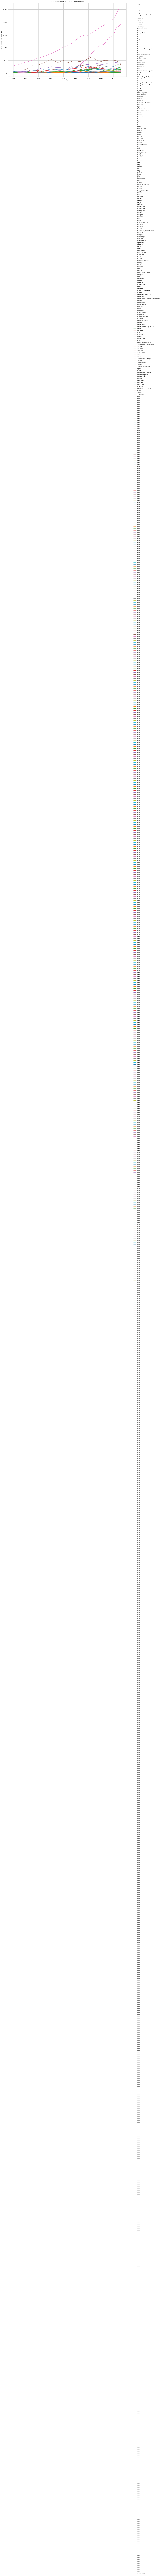

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
for country in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[country], label=country)
plt.xticks(df_transposed.index[::5])
plt.title('GDP Evolution (1980-2023) - All Countries')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of U.S. dollars)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error: 3118136.2066442403


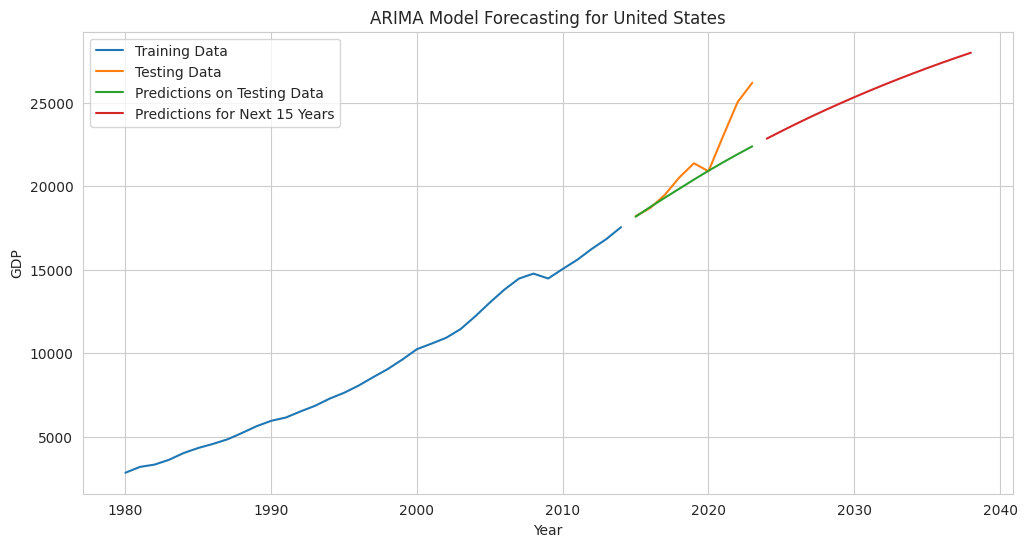

In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
df = pd.read_csv('World_GDP_Dataset.csv', index_col=0)
df_transposed = df.transpose()
df_transposed.index = pd.to_datetime(df_transposed.index)
df_transposed = df_transposed.loc['1980':'2023']
country_to_forecast = 'United States'
data = df_transposed[country_to_forecast]
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test) + 15)
mse = mean_squared_error(test, forecast[:len(test)])
print('Mean Squared Error:', mse)
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, forecast[:len(test)], label='Predictions on Testing Data')
plt.plot(forecast[len(test):].index, forecast[len(test):], label='Predictions for Next 15 Years')
plt.title('ARIMA Model Forecasting for {}'.format(country_to_forecast))
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error for Brazil : 185823.64160038403


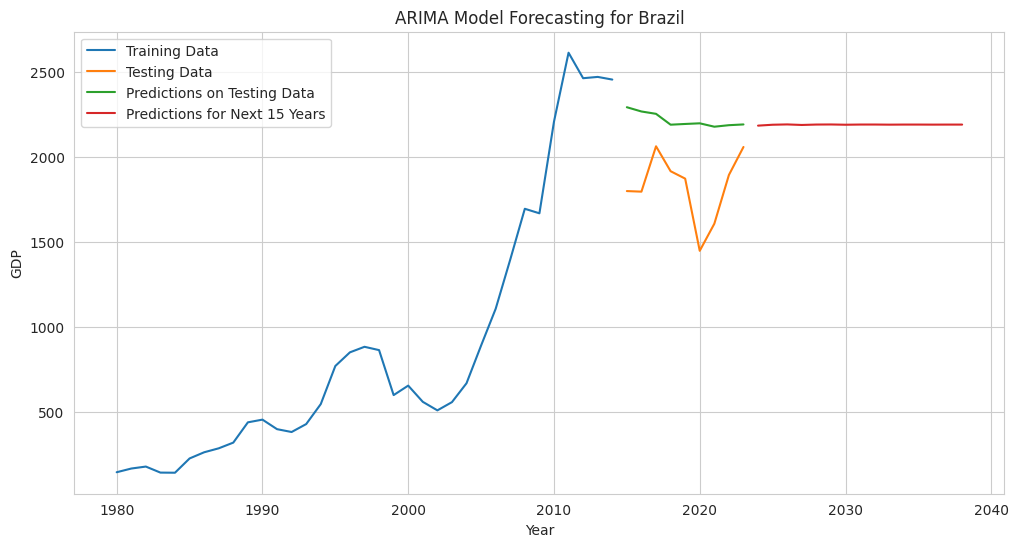

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error for Russian Federation : 367476.21451056254


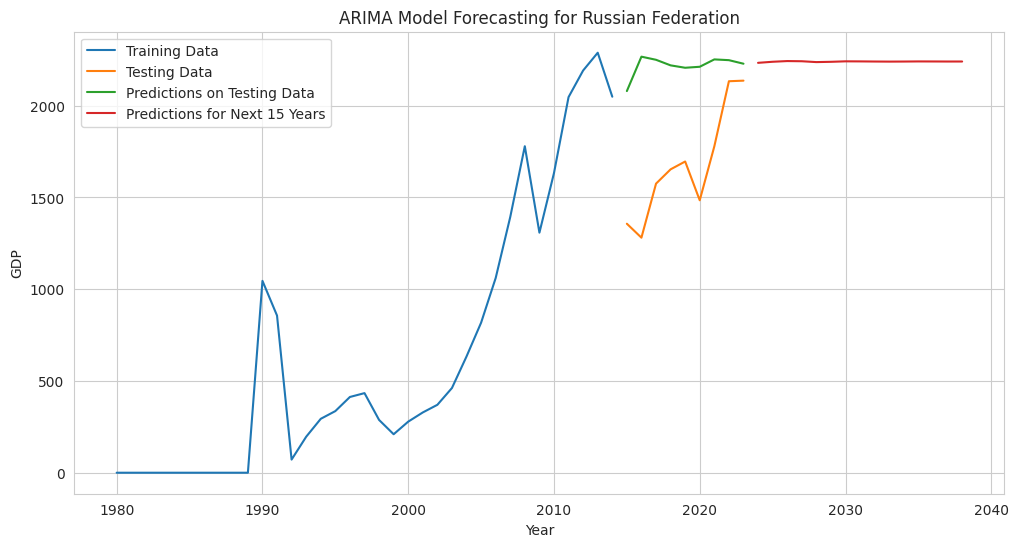

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error for India : 386031.4193048086


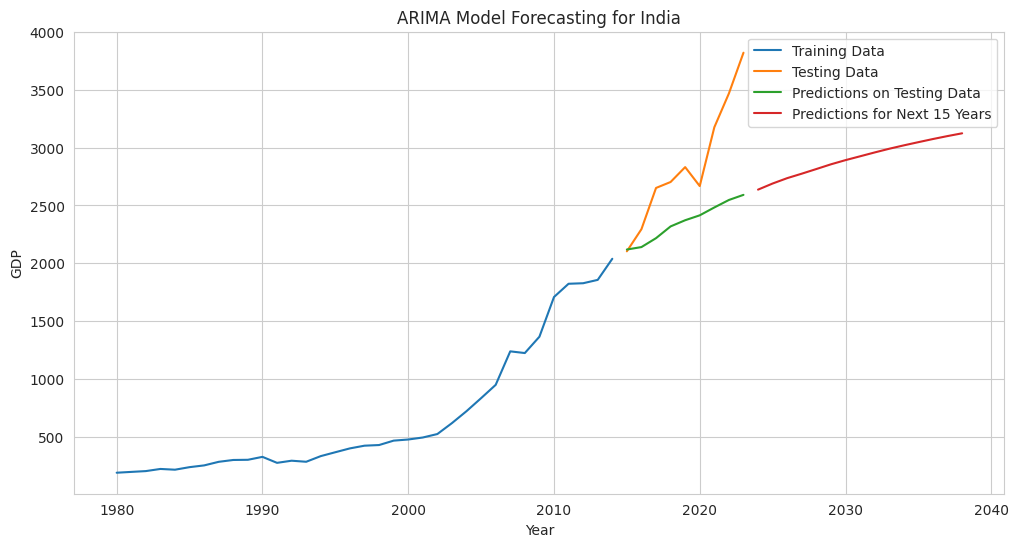

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error for China, People's Republic of : 1924971.9769679855


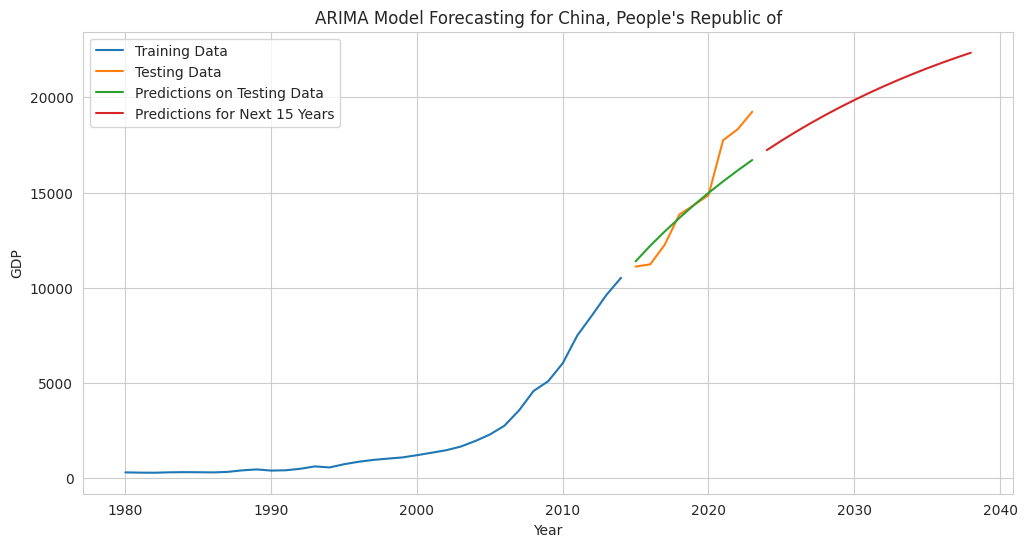

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error for South Africa : 1307.2890967366611


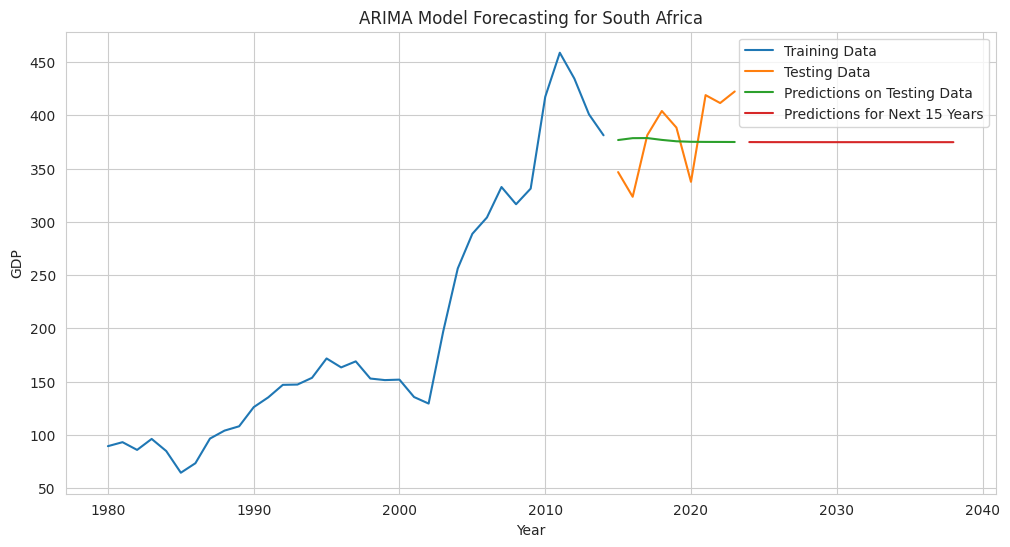

In [39]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
df = pd.read_csv('World_GDP_Dataset.csv', index_col=0)
df_transposed = df.transpose()
df_transposed.index = pd.to_datetime(df_transposed.index)
df_transposed = df_transposed.loc['1980':'2023']
countries_to_forecast = ['Brazil','Russian Federation','India' ,"China, People's Republic of", 'South Africa']

# Loop through each country and perform forecasting
for country_to_forecast in countries_to_forecast:
    data = df_transposed[country_to_forecast]
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit ARIMA model
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test) + 15)

    # Calculate Mean Squared Error
    mse = mean_squared_error(test, forecast[:len(test)])
    print('Mean Squared Error for', country_to_forecast, ':', mse)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Testing Data')
    plt.plot(test.index, forecast[:len(test)], label='Predictions on Testing Data')
    plt.plot(forecast[len(test):].index, forecast[len(test):], label='Predictions for Next 15 Years')
    plt.title('ARIMA Model Forecasting for {}'.format(country_to_forecast))
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.legend()
    plt.show()


For those forecasting, I choosed to take the BRICS,because these are countries that are expected to develop over the years, and for this reason, I chose to see what the evolution of their GDP would be
As we can see, the only 2 countries that has their GDP that is stable or going down are South Africa and Brazil
The 3 lefts(Russia,India and China), their forecasting predict a grow of the GDP until 2040
